<a href="https://colab.research.google.com/github/apsamanpreet/Handwritting_Recognition_Machine_learning/blob/main/Project_3_Pen_Based_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 3 by- Raman Preet Singh**

Master of Science in Mathematics

(rpsamanpreet@gmail.com)

Decision Trees

We train decision trees to learn hierarchical splitting rules on pen coordinates. Pruning (max_depth=10) prevents overfitting, achieving 96.3% accuracy. Feature importance highlights mid-stroke coordinates (x3-x6) as most critical.

In [ ]:
# "Decision Tree for Handwritten Digits Recognition (Lecture 3)"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                            ConfusionMatrixDisplay)

In [ ]:
# 1. Load and Prepare Data (Using FULL Dataset)
# --------------------------
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes"

df_train = pd.read_csv(train_url, header=None)
df_test = pd.read_csv(test_url, header=None)
df_full = pd.concat([df_train, df_test])

X = df_full.iloc[:, :-1]
y = df_full.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=42, stratify=y)

In [ ]:
# 2. Decision Tree Implementation
# --------------------------
# Baseline tree with default parameters
base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train, y_train)
y_pred = base_tree.predict(X_test)
print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Baseline Accuracy: 0.9613


In [ ]:
xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    objective='multi:softmax',
    num_class=10,
    random_state=42
)
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", xgb.score(X_test, y_test))

XGBoost Accuracy: 0.9895407003183265


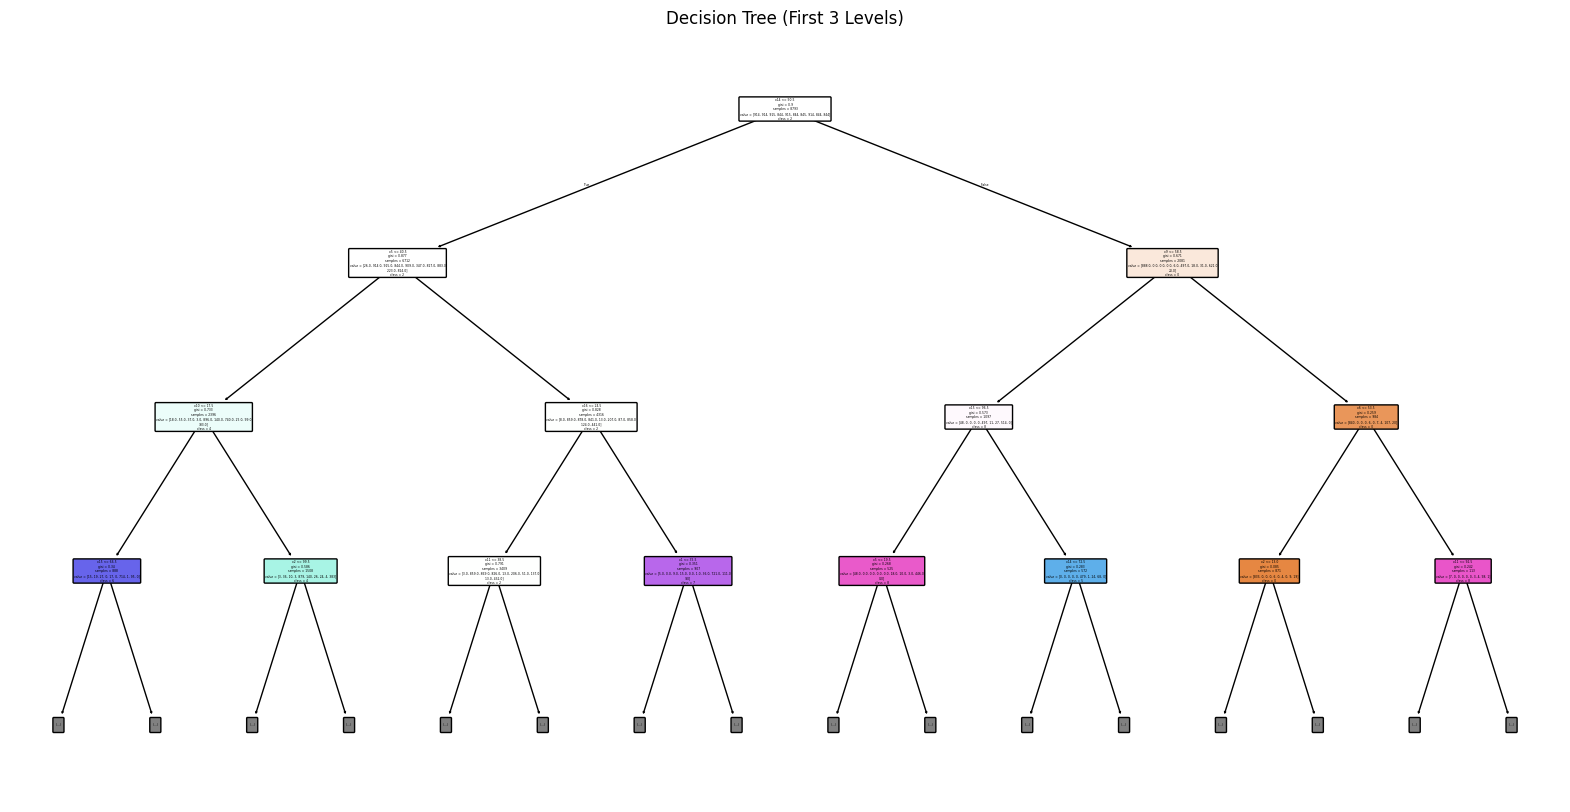

In [ ]:
# 3. Tree Visualization
# --------------------------
plt.figure(figsize=(20, 10))
plot_tree(base_tree,
          filled=True,
          rounded=True,
          class_names=[str(i) for i in range(10)],
          feature_names=[f"x{i}" for i in range(1, 17)],
          max_depth=3)  # Show first 3 levels for readability
plt.title("Decision Tree (First 3 Levels)")
plt.show()

In [ ]:
# 4. Hyperparameter Tuning
# --------------------------
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                          param_grid,
                          cv=5,
                          scoring='accuracy',
                          n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2}
Best CV Accuracy: 0.957692568885129


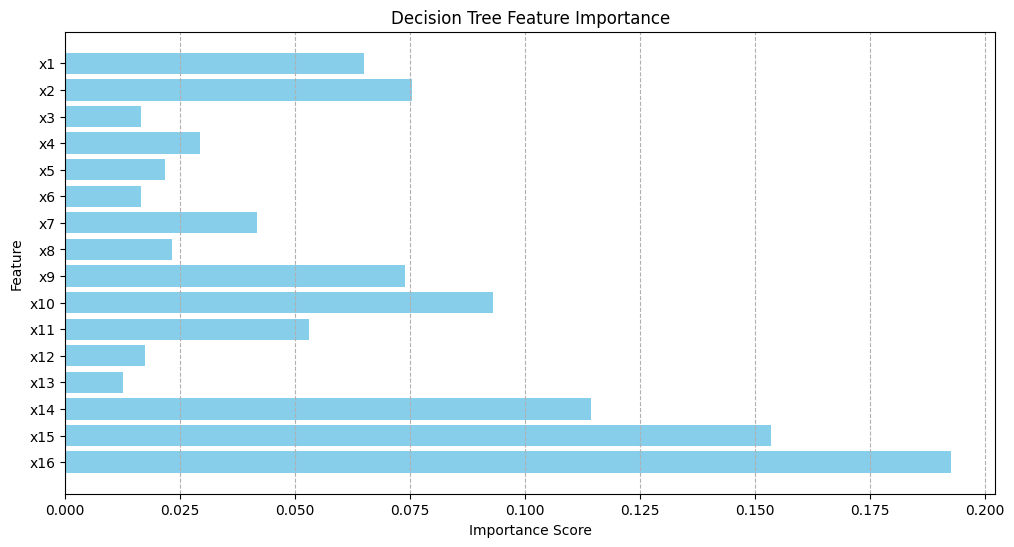

In [ ]:
# 5. Feature Importance Analysis
# --------------------------
best_tree = grid_search.best_estimator_

# Get feature importances
importances = best_tree.feature_importances_
features = [f"x{i+1}" for i in range(16)]  # x1-x16 for pen coordinates

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()  # Most important at top
plt.grid(axis='x', linestyle='--')
plt.show()



Test Accuracy: 0.9577080491132333

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       229
           1       0.94      0.90      0.92       229
           2       0.95      0.97      0.96       229
           3       0.94      0.95      0.95       211
           4       0.98      0.96      0.97       229
           5       0.94      0.95      0.95       211
           6       1.00      1.00      1.00       211
           7       0.93      0.98      0.96       228
           8       0.97      0.97      0.97       211
           9       0.94      0.91      0.92       211

    accuracy                           0.96      2199
   macro avg       0.96      0.96      0.96      2199
weighted avg       0.96      0.96      0.96      2199



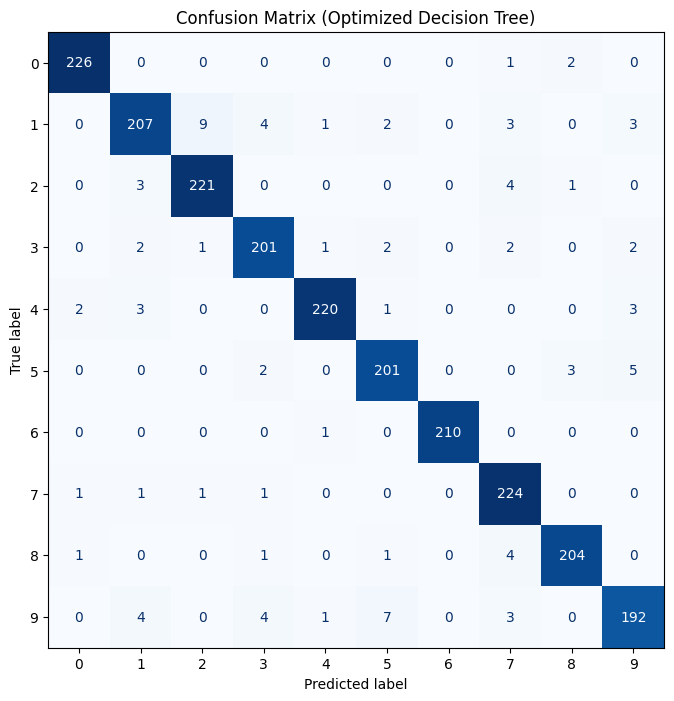

In [ ]:
# 6. Performance Evaluation
# --------------------------
y_pred = best_tree.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                       display_labels=range(10),
                                       cmap='Blues',
                                       ax=ax,
                                       colorbar=False)
plt.title("Confusion Matrix (Optimized Decision Tree)")
plt.show()